In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

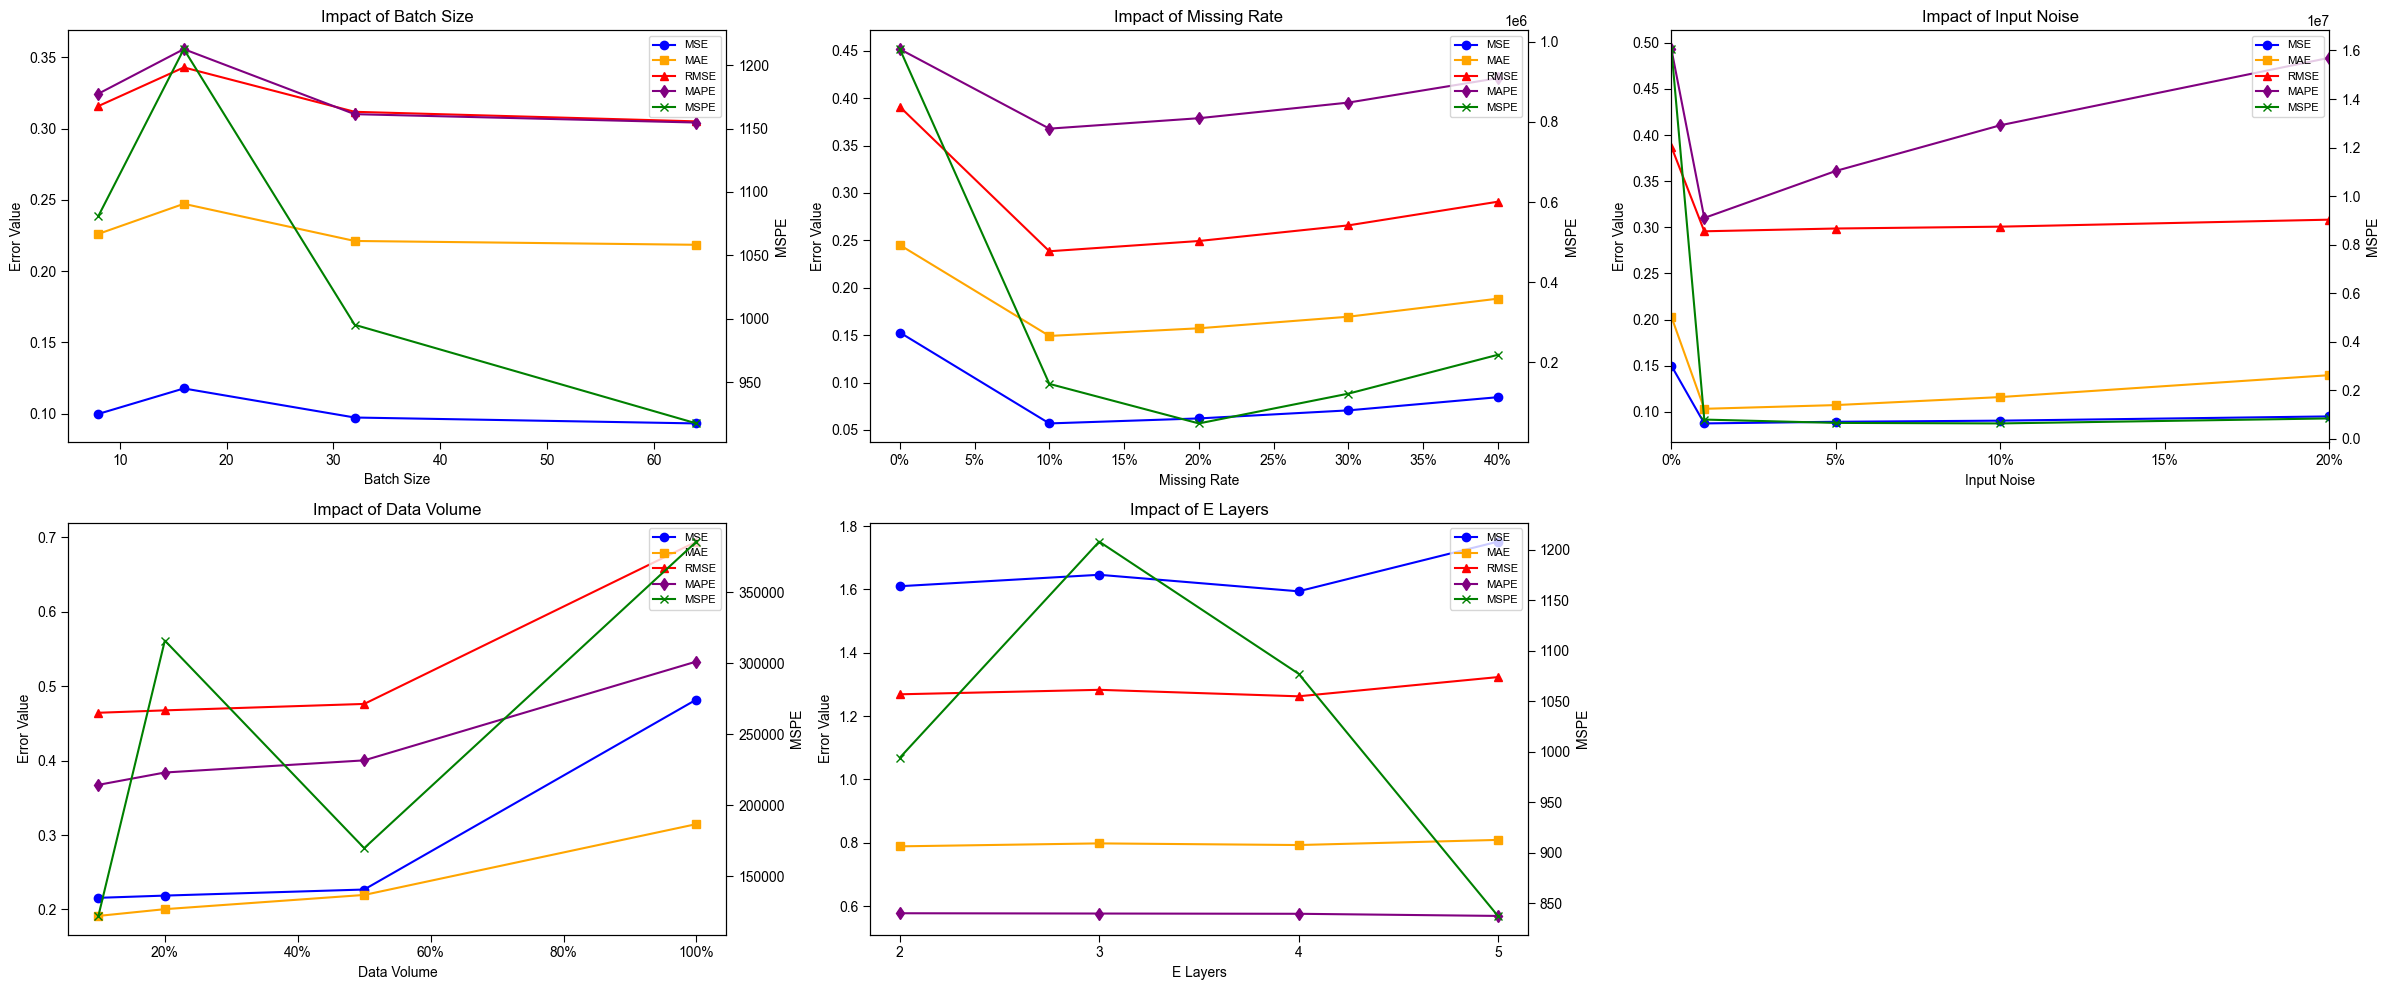

In [2]:

plt.rcParams['font.family'] = 'Arial'

file_path = '5104tables.xlsx'
sheets = ['Sheet6', 'Sheet7', 'Sheet8', 'Sheet9', 'Sheet10']

custom_titles = [
    "Impact of Batch Size",
    "Impact of Missing Rate",
    "Impact of Input Noise",
    "Impact of Data Volume",
    "Impact of E Layers"
]

fig, axes = plt.subplots(2, 3, figsize=(24, 10))
axes = axes.flatten()

for i, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    df = df.sort_values(by=df.columns[0])
    x = df.iloc[:, 0]
    x_label = df.columns[0].title()

    required_cols = ['MSE', 'MAE', 'RMSE', 'MAPE', 'MSPE']
    if not set(required_cols).issubset(df.columns):
        continue

    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    ax1.plot(x, df['MSE'], marker='o', label='MSE', color='blue')
    ax1.plot(x, df['MAE'], marker='s', label='MAE', color='orange')
    ax1.plot(x, df['RMSE'], marker='^', label='RMSE', color='red')
    ax1.plot(x, df['MAPE'], marker='d', label='MAPE', color='purple')
    ax1.set_ylabel('Error Value')
    
    ax2.plot(x, df['MSPE'], marker='x', label='MSPE', color='green')
    ax2.set_ylabel('MSPE')

    ax1.set_title(custom_titles[i])
    ax1.set_xlabel(x_label)
    ax1.grid(False)
    ax2.grid(False)
    ax1.tick_params(axis='both', which='major', length=5)
    ax1.tick_params(axis='both', which='minor', length=3)
    ax2.tick_params(axis='both', which='major', length=5)
    ax2.tick_params(axis='both', which='minor', length=3)
    
    if i in [1, 2, 3]:
        def to_percent(x_val, pos):
            return '{:.0f}%'.format(x_val * 100) if x_val <= 1 else '{:.0f}%'.format(x_val)
        ax1.xaxis.set_major_formatter(FuncFormatter(to_percent))
        
    if i == 2:
        xticks = [0, 0.05, 0.10, 0.15, 0.20]
        ax1.set_xticks(xticks)
        ax1.set_xlim(0, 0.20)  
        ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x * 100)}%'))

    if i == 4:
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

  
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=8)

fig.delaxes(axes[5])

plt.tight_layout()
plt.style.use('default')

plt.show()